# Customer Churn Analysis

In [39]:
# Import needed libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# read the data
df = pd.read_csv("CustomerChurn.csv")

In [41]:
# quick look at data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attribute of data like shape (row and col), columns, data types etc

In [42]:
df.shape

(7043, 21)

In [43]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [44]:
# checking the data type 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Note down your findings

<ul>
<li>SeniorCitizen is actually a categorical data, hence the distribution 25%-50%-75% is not proper</li>
<li>75% of customers have tenure less than 55 months</li>
<li>Average Monthly charge are USD 67.76 where as 75% of customers pay more than USD 89.85 per month</li>
</ul>

Text(0.5, 1.02, 'Count of Target Variable per category')

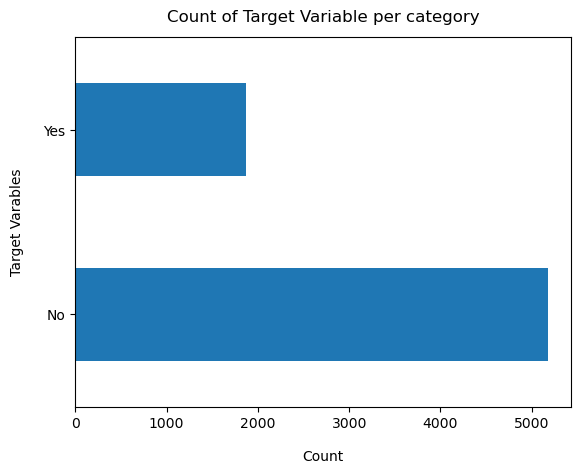

In [46]:
# Visualize
df["Churn"].value_counts()
df["Churn"].value_counts().plot(kind= "barh")
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Varables", labelpad=14)
plt.title("Count of Target Variable per category", y=1.02)

Data Cleaning

***1. Create a new copy of the data base***

In [47]:
new_df = df.copy()

***2. Total Charge should be numeric amount. Lets convert it to numerical data type***

In [48]:
# Convert TotalCharges column to numeric data type
new_df["TotalCharges"] = pd.to_numeric(new_df["TotalCharges"], errors="coerce")
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64